In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Nhan_dien_van_tay/train'
test_path = '/content/drive/MyDrive/Nhan_dien_van_tay/test'

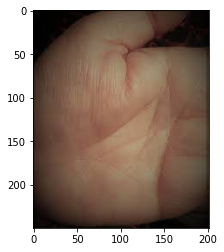

In [4]:
img = load_img('/content/drive/MyDrive/Nhan_dan_chi_tay/train/giauco/3 (10).jpg')
rotated_image = img.rotate(0)
plt.imshow(rotated_image)

In [5]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/Nhan_dan_chi_tay/train",
    target_size=(150, 150),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/Nhan_dan_chi_tay/test",
    target_size=(150, 150),
    batch_size=3,
    class_mode= "categorical",
    )

Found 100 images belonging to 4 classes.
Found 44 images belonging to 4 classes.


In [7]:
train_dataset.class_indices

{'co_tinh_cam_va_cong_viec_suat_sac': 0,
 'duong_tinh_duyen_trac_tro': 1,
 'giauco': 2,
 'tainang_thongminh': 3}

In [8]:
from keras.layers.core.flatten import Flatten
model = Sequential([
    Conv2D(16,(3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [9]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])
history=model.fit(train_dataset,epochs=30,batch_size=64,verbose=1,validation_data= test_dataset)

Epoch 1/30
34/34 [==============================] - 76s 2s/step - loss: 1.4289 - accuracy: 0.3400 - val_loss: 1.3817 - val_accuracy: 0.2955
Epoch 2/30
34/34 [==============================] - 6s 194ms/step - loss: 1.3603 - accuracy: 0.3700 - val_loss: 1.3294 - val_accuracy: 0.4773
Epoch 3/30
34/34 [==============================] - 6s 191ms/step - loss: 1.2268 - accuracy: 0.4100 - val_loss: 1.2851 - val_accuracy: 0.4318
Epoch 4/30
34/34 [==============================] - 6s 193ms/step - loss: 1.0821 - accuracy: 0.5500 - val_loss: 1.2512 - val_accuracy: 0.3864
Epoch 5/30
34/34 [==============================] - 6s 192ms/step - loss: 1.0199 - accuracy: 0.5000 - val_loss: 1.3663 - val_accuracy: 0.2727
Epoch 6/30
34/34 [==============================] - 6s 192ms/step - loss: 0.9348 - accuracy: 0.5600 - val_loss: 1.2535 - val_accuracy: 0.3636
Epoch 7/30
34/34 [==============================] - 6s 186ms/step - loss: 0.7509 - accuracy: 0.7200 - val_loss: 1.1494 - val_accuracy: 0.3864
Epoch 8/

In [10]:
model.save('palm_reading.h5')

In [11]:
from keras.models import load_model
model5 = load_model('palm_reading.h5')

In [12]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [15]:
labels = {0: 'co_tinh_cam_va_cong_viec_suat_sac',
          1: 'duong_tinh_duyen_trac_tro',
          2: 'giauco',
          3: 'tainang_thongminh'}

Du doan ban se co:  giauco


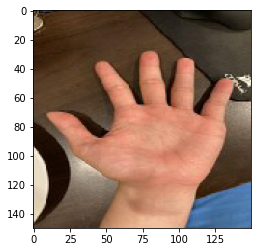

In [16]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/tay_Huy.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])

Du doan ban se co:  duong_tinh_duyen_trac_tro


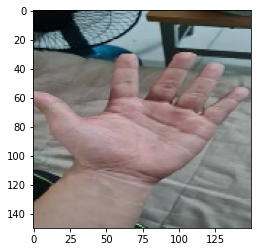

In [17]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Hoa_hand.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])

Du doan ban se co:  duong_tinh_duyen_trac_tro


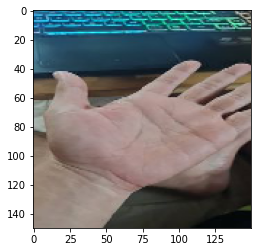

In [18]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Hoa_hand_2.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])

Du doan ban se co:  duong_tinh_duyen_trac_tro


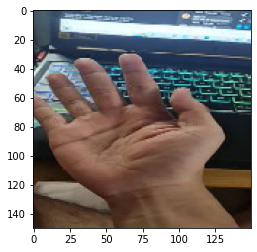

In [19]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Hoa_hand_3.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])

Du doan ban se co:  giauco


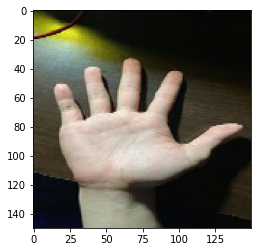

In [20]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Huy_hand_2.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])

Du doan ban se co:  duong_tinh_duyen_trac_tro


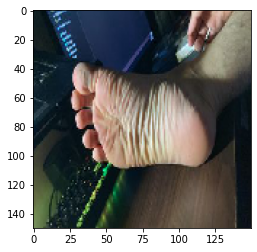

In [21]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Huy_feet.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])

Du doan ban se co:  duong_tinh_duyen_trac_tro


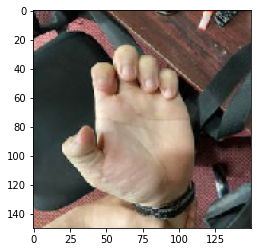

In [22]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/taY_ai_do.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Du doan ban se co: ', labels[np.argmax(val)])